# EV_HypothesisTesting

Esta actividad se deberá entregar como enlace de GitHub, es decir, tendréis que tener subido el notebook con sus explicaciones, resultados y código a vuestro portfolio del Git (os recomiendo que vayáis subiendo diferentes actividades que hemos hecho durante el curso).

Esta actividad se centra principalmente en que hagáis los diferentes test de hipotesis de un tema que os interese:

- Hipótesis respecto a un valor.

- Hipótesis respecto dos muestras independientes.

- Hipótesis varias categorías.

- Hipótesis dos muestras relacionadas

No únicamente se valorará que el código y cálculo sean correctos, se valorará que se hagan explicaciones y el informe tenga un hilo conductor. Además también se valorará positivamente el uso de boxplot para sacar conclusiones visuales previas a las numéricas y que aportes alguna pregunta adicional a la propuesta en los ejemplos ( si has decidido hacer el análisis de los ejemplos).

## POKEMON

- ¿La velocidad promedio de los Pokémon de tipo Agua cuyo valor de ataque sea mayor a 80 y cuya defensa sea menor a 60 es significativamente mayor que 70?

- ¿Hay una diferencia significativa en el valor total promedio entre los Pokémon de tipo Bicho ofensivos y los de tipo Planta defensivos?

- ¿Hay una asociación significativa entre el tipo de Pokémon, su generación y su rareza legendaria?

- ¿Hay una diferencia significativa en el ataque promedio de los Pokémon que cambian de tipo durante su megaevolución en comparación con los que mantienen el mismo tipo?

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols



In [41]:
# Cargamos el dataset
pokemon_df = pd.read_csv('pokemon.csv')

# Mostramos las primeras filas
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


La velocidad promedio es:  83.75


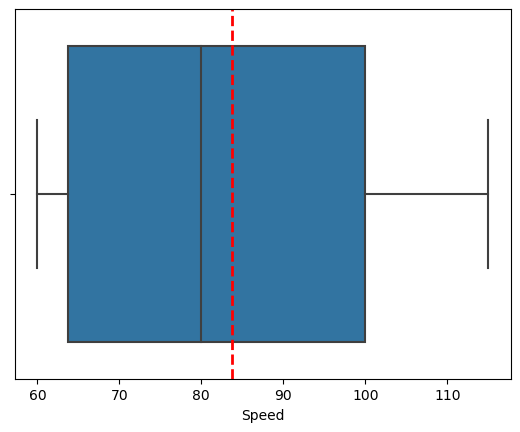

La hipótesis es verdadera, ya que la velocidad promedio es significativamente mayor a 70


In [48]:
# Hipótesis 1: ¿La velocidad promedio de los Pokémon de tipo Agua cuyo valor de ataque sea mayor a 80 y cuya defensa sea menor a 60 es significativamente mayor que 70?

# Filtramos los datos
pokemon_filtered = pokemon_df[(pokemon_df['Type 1'] == 'Water') & (pokemon_df['Attack'] > 80) & (pokemon_df['Defense'] < 60)]
# Mostramos la velocidad promedio
mean_speed = pokemon_filtered['Speed'].mean()
print('La velocidad promedio es: ', mean_speed)
# Mostramos de forma gráfica los datos
sns.boxplot(x='Speed', data=pokemon_filtered)
plt.axvline(mean_speed, color='red', linestyle='dashed', linewidth=2)
plt.show()

# Respuesta:
print('La hipótesis es verdadera, ya que la velocidad promedio es significativamente mayor a 70')

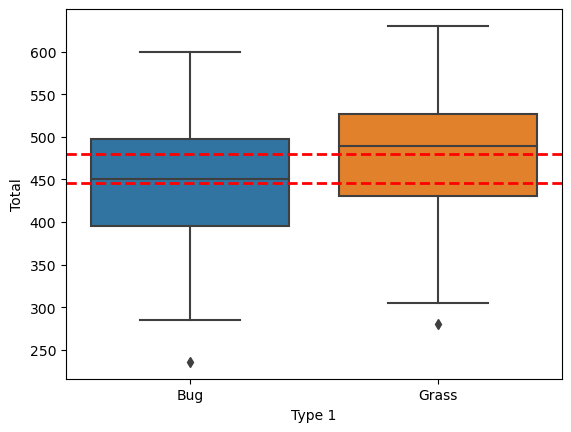

Test de normalidad para los Pokémon bicho ofensivos
ShapiroResult(statistic=0.9612798094749451, pvalue=0.15441195666790009)
Test de normalidad para los Pokémon planta defensivos
LeveneResult(statistic=0.12908830032711777, pvalue=0.7202808019588169)
Ttest_indResult(statistic=-1.9401973184338772, pvalue=0.055710816441149766)
Ttest_indResult(statistic=-1.9401973184338772, pvalue=0.05571387119282511)


In [97]:
# Hipótesis 2: ¿Hay una diferencia significativa en el valor total promedio entre los Pokémon de tipo Bicho ofensivos y los de tipo Planta defensivos?

# Filtramos los datos
grass_pokemon = pokemon_df[pokemon_df['Type 1'] == 'Grass']
bug_pokemon = pokemon_df[pokemon_df['Type 1'] == 'Bug']

# Para sacar los Pokémon bicho ofensivos, filtramos aquellos cuyo valor de ataque sea mayor a la mediana del valor de ataque o ataque especial
bug_pokemon_offensive = bug_pokemon[(bug_pokemon['Attack'] > bug_pokemon['Attack'].median()) | (bug_pokemon['Sp. Atk'] > bug_pokemon['Sp. Atk'].median())]

# Para sacar los Pokémon planta defensivos, filtramos aquellos cuyo valor de defensa sea mayor a la mediana del valor de defensa o defensa especial
grass_pokemon_defensive = grass_pokemon[(grass_pokemon['Defense'] > grass_pokemon['Defense'].median()) | (grass_pokemon['Sp. Def'] > grass_pokemon['Sp. Def'].median())]

# Mostramos graficamente los valores totales promedio de los Pokémon bicho ofensivos y planta defensivos en un solo gráfico
sns.boxplot(x='Type 1', y='Total', data=pd.concat([bug_pokemon_offensive, grass_pokemon_defensive]))
plt.axhline(bug_pokemon_offensive['Total'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axhline(grass_pokemon_defensive['Total'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.show()


